In [ ]:
#Loading libraries 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder
from scipy.special import boxcox1p
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC,Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb


%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 73 bytes


In [ ]:
!kaggle competitions download --force -c house-prices-advanced-regression-techniques

  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 58.2MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 31.6MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 61.7MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 13.3MB/s]


In [ ]:
!ls

data_description.txt  sample_data  sample_submission.csv  test.csv  train.csv


In [ ]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
combine = [train_data, test_data]

In [ ]:
train_id = train_data['Id']
test_id = test_data['Id']

In [ ]:
for dataset in combine:
    dataset.drop('Id',axis=1,inplace=True)

In [ ]:
train_data.shape, test_data.shape


((1460, 80), (1459, 79))

In [ ]:
train_data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


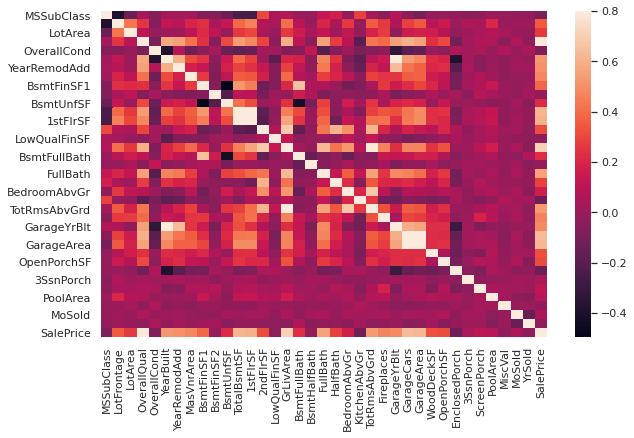

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(train_data.corr(),vmax=0.8)

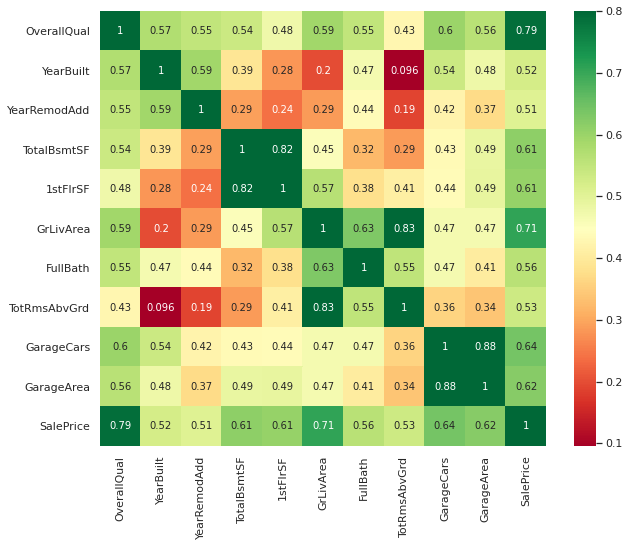

In [ ]:
top_features = train_data.corr().index[abs(train_data.corr()['SalePrice'] > 0.5)]
plt.figure(figsize=(10,8))
sns.heatmap(train_data[top_features].corr(),vmax=0.8,annot=True,cmap='RdYlGn')

In [ ]:

new_top_features = ['OverallQual','YearRemodAdd','YearBuilt','TotalBsmtSF','TotRmsAbvGrd','1stFlrSF','GrLivArea','FullBath','GarageCars']

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


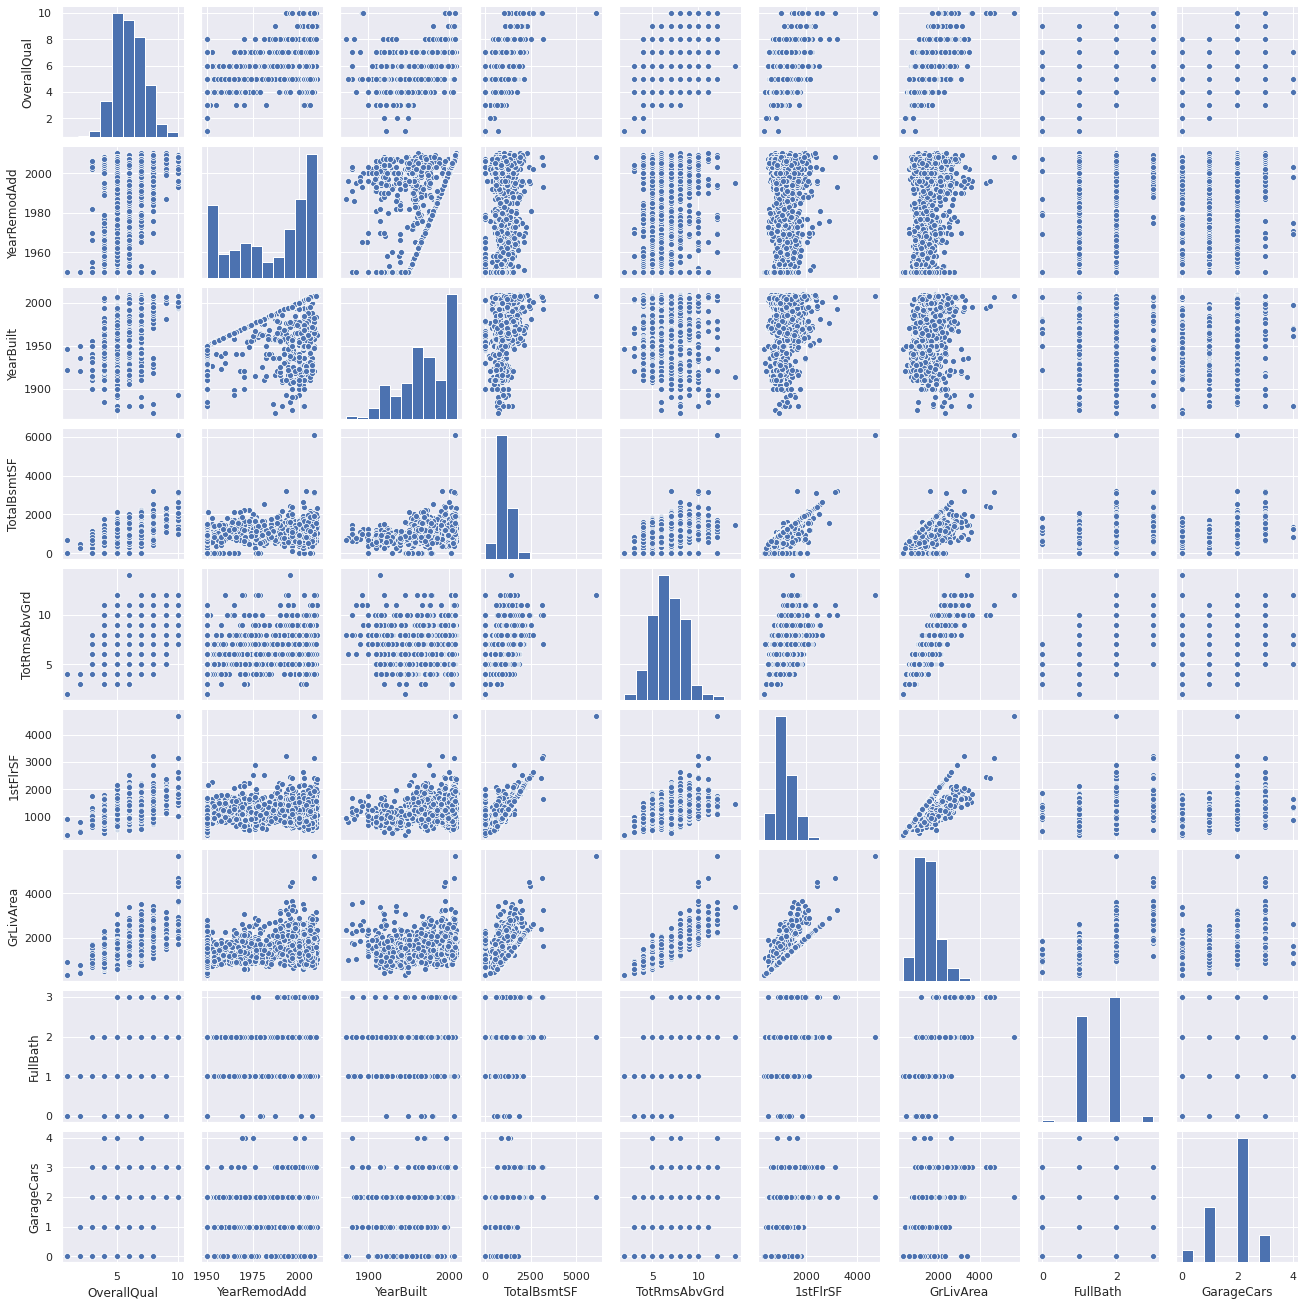

In [ ]:
sns.set()
sns.pairplot(train_data[new_top_features],size=2)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Unrecognized location 'top-right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  """


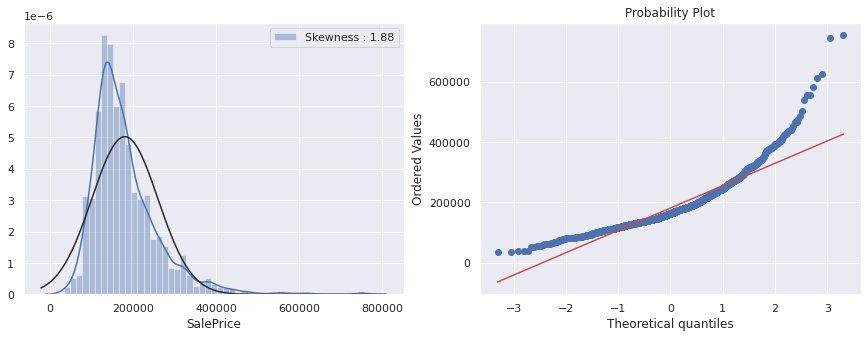

In [ ]:
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
g = sns.distplot(train_data['SalePrice'], fit=norm, label = "Skewness : %.2f"%(train_data['SalePrice'].skew()));
g = g.legend(loc="top-right")

plt.subplot(1, 2, 2)
res = stats.probplot(train_data['SalePrice'], plot=plt)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'top-right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


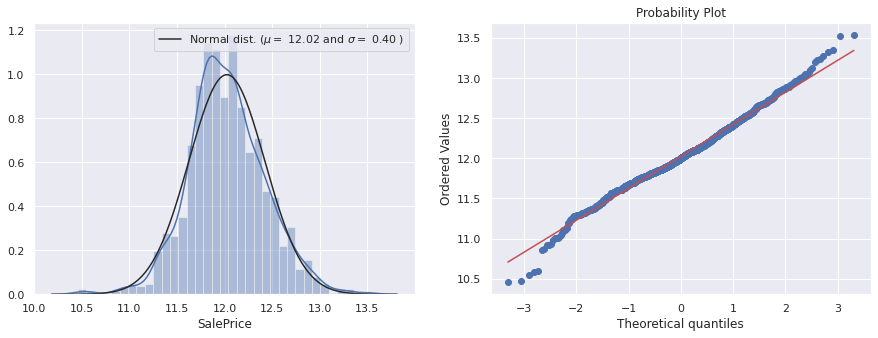

In [ ]:

train_data["SalePrice"] = np.log(train_data["SalePrice"])
(mu, sigma) = norm.fit(train_data['SalePrice'])

plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
g = sns.distplot(train_data['SalePrice'], fit=norm)
g.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='top-right')

plt.subplot(1, 2, 2)
res = stats.probplot(train_data['SalePrice'], plot=plt)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


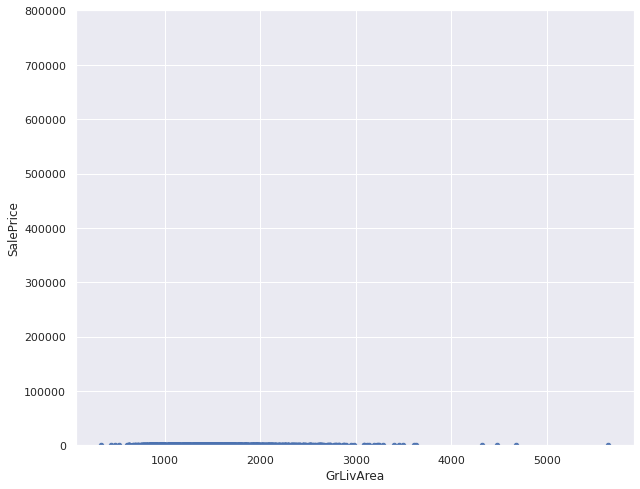

In [ ]:
var = 'GrLivArea'

data = pd.concat([train_data[var],train_data['SalePrice']],axis=1)
data.plot.scatter(x = var, y ='SalePrice',ylim=(0,800000))

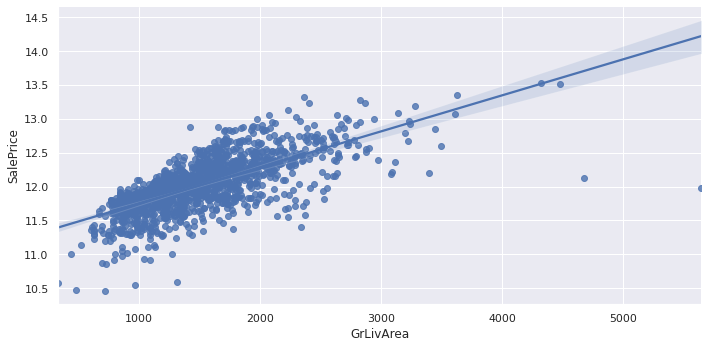

In [ ]:

sns.lmplot('GrLivArea', 'SalePrice', train_data, height=5, aspect=2)

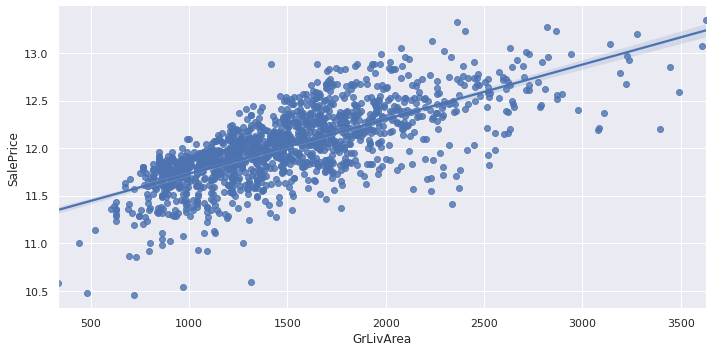

In [ ]:
train_data = train_data.drop(train_data[(train_data['GrLivArea']>4000) & (train_data['SalePrice']<250000)].index)

sns.lmplot('GrLivArea', 'SalePrice', train_data, height=5, aspect=2)                                                       

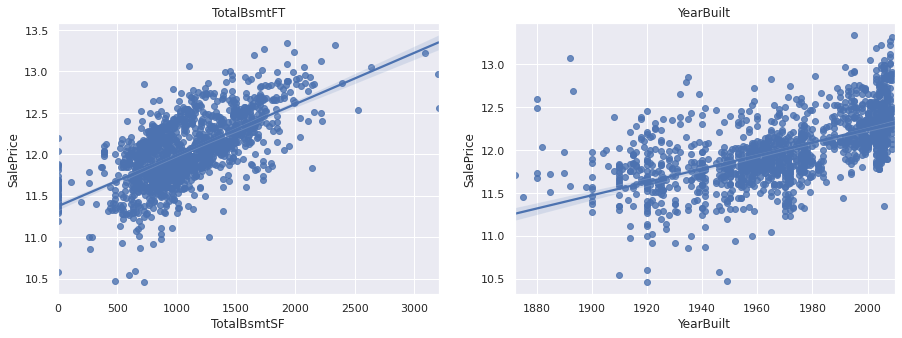

In [ ]:
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
g = sns.regplot(x=train_data['TotalBsmtSF'], y=train_data['SalePrice'], fit_reg=True).set_title("TotalBsmtFT")

plt.subplot(1, 2, 2)
g = sns.regplot(x=train_data['YearBuilt'], y=train_data['SalePrice'], fit_reg=True).set_title("YearBuilt")


In [ ]:
y_train = np.log1p(train_data['SalePrice'])

In [ ]:
ntrain = train_data.shape[0]
ntest = test_data.shape[0]
y_train = train_data['SalePrice'].values

In [ ]:
all_data = pd.concat([train_data,test_data]).reset_index(drop=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [ ]:
all_data.drop(['SalePrice'],axis=1,inplace=True)

In [ ]:
all_data.shape


(2915, 79)

*italicized text*# **Data Cleaning**
Imputing missing values (in order of above table)

Data description states that NA in ‘PoolQC’ means no Pool, NA in ‘MiscFeature’ means no misc feature and so on for ‘Alley’, ‘Fence’ and ‘FireplaceQu’. For these, we can fill NA with “None”

In [ ]:
#check missing values
all_data.columns[all_data.isnull().any()]

Index(['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'Electrical', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt',
       'KitchenQual', 'LotFrontage', 'MSZoning', 'MasVnrArea', 'MasVnrType',
       'MiscFeature', 'PoolQC', 'SaleType', 'TotalBsmtSF', 'Utilities'],
      dtype='object')

In [ ]:
col = ("PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageType", "GarageFinish", 
       "GarageQual", "GarageCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", 
       "MasVnrType", "MSSubClass")


for i in col:
     
     all_data[i] = all_data[i].fillna("None")


In [ ]:
col = ("GarageArea", "GarageCars", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", 
       "TotalBsmtSF", "MasVnrArea", "BsmtFullBath", "BsmtHalfBath")

for i in col:
   all_data[i] = all_data[i].fillna(all_data[i].fillna(0))

In [ ]:
col = ("MSZoning", "Electrical", "KitchenQual", "Exterior1st", "Exterior2nd", "SaleType", "Functional")
for i in col:
    all_data[i] = all_data[i].fillna(all_data[i].mode()[0])



In [ ]:
all_data['Utilities'].value_counts()


AllPub    2912
NoSeWa       1
Name: Utilities, dtype: int64

In [ ]:
# Fixing missing values for GarageYrBlt
all_data["GarageYrBlt"] = all_data["GarageYrBlt"].fillna(all_data["YearBuilt"])

# Fixing missing values for LotFrontage
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(  lambda x: x.fillna(x.median()))

# Dropping the Utilities variable
all_data = all_data.drop(['Utilities'], axis=1)

In [ ]:
# Total Sq Feet of the house
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

# Freshness: How old was the house when it was sold
all_data['Freshness'] = all_data['YrSold'] -all_data['YearBuilt']

In [ ]:
# Converting to categorical features
col = ("YrSold", "MoSold", "OverallCond")
for i in col:
     all_data[i] = all_data[i].astype(str)
    
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for i in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[i].values)) 
    all_data[i] = lbl.transform(list(all_data[i].values))

# shape        
print('Shape : {}'.format(all_data.shape))

Shape : (2915, 80)


# of missing values = 6952


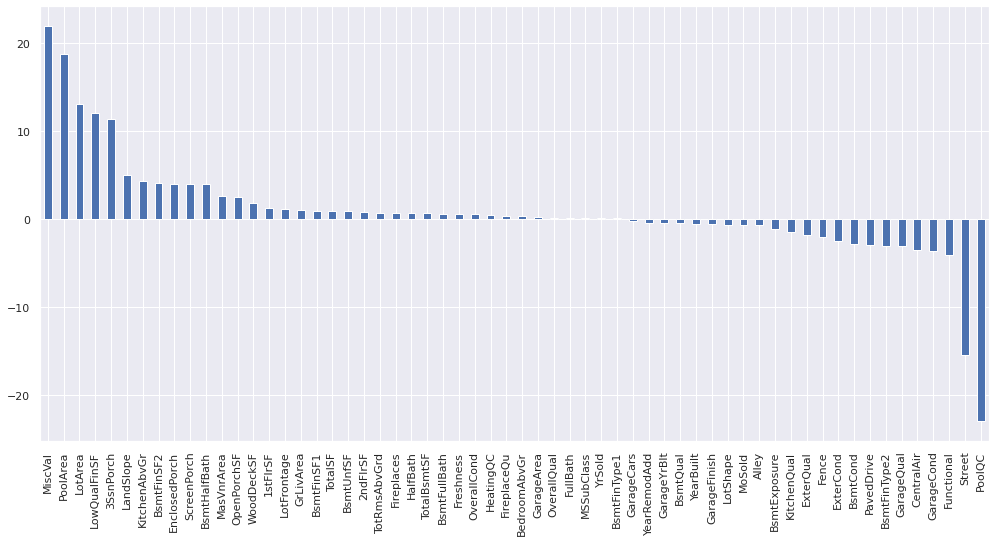

In [ ]:
# Getting the indices of numeric columns
numcolumns = all_data.dtypes[all_data.dtypes != "object"].index

# Check how skewed they are
skewed = all_data[numcolumns].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

plt.subplots(figsize =(17, 8))
skewed.plot(kind='bar');

In [ ]:
# We will transform only the variables that have an extremely large skewness (>0.75)
skewness = skewed[abs(skewed) > 0.75]

skewed = skewness.index
lam = 0.15
for i in skewed:
    all_data[i] = boxcox1p(all_data[i], lam)

print(skewness.shape[0],  "skewed numerical features have been Box-Cox transformed")

35 skewed numerical features have been Box-Cox transformed


In [ ]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)
all_data.head()

(2915, 221)


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,EnclosedPorch,ExterCond,ExterQual,Fence,FireplaceQu,Fireplaces,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageYrBlt,GrLivArea,HalfBath,HeatingQC,KitchenAbvGr,KitchenQual,LandSlope,LotArea,LotFrontage,LotShape,LowQualFinSF,...,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,11.692623,11.686189,0.0,1,3,1.820334,1.540963,11.170327,0.0,2,2.259674,1.0,0.000000,2,7.483296,0.730463,0.000000,1.820334,1.194318,1.820334,3,0,2,2.259674,548.0,2.0,2.055642,2,2.055642,2003.0,13.698888,1,0,0.730463,1.194318,0.0,19.212182,5.831328,3,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,12.792276,0.000000,0.0,1,3,1.820334,0.730463,12.062832,0.0,0,2.259674,0.0,0.730463,2,8.897844,0.730463,0.000000,1.820334,1.540963,1.820334,5,1,2,2.259674,460.0,2.0,2.055642,2,2.055642,1976.0,12.792276,0,0,0.730463,1.540963,0.0,19.712205,6.221214,3,0.0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,11.892039,11.724598,0.0,1,3,1.820334,1.194318,10.200343,0.0,2,2.259674,1.0,0.000000,2,9.917060,0.730463,0.000000,1.820334,1.194318,1.820334,5,1,2,2.259674,608.0,2.0,2.055642,2,2.055642,2001.0,13.832085,1,0,0.730463,1.194318,0.0,20.347241,5.914940,0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,12.013683,11.354094,0.0,1,3,0.730463,1.540963,8.274266,0.0,0,2.259674,1.0,0.000000,4,10.468500,0.730463,8.797736,1.820334,1.540963,1.820334,2,1,1,2.259674,642.0,3.0,2.055642,3,2.055642,1998.0,13.711364,0,2,0.730463,1.194318,0.0,19.691553,5.684507,0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,12.510588,12.271365,0.0,1,4,1.820334,0.000000,10.971129,0.0,2,2.259674,1.0,0.000000,2,10.221051,0.730463,0.000000,1.820334,1.194318,1.820334,5,1,2,2.259674,836.0,3.0,2.055642,2,2.055642,2000.0,14.480029,1,0,0.730463,1.194318,0.0,21.325160,6.314735,0,0.0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [ ]:
all_data.shape


(2915, 221)

In [ ]:
train_data = all_data[:ntrain]
test_data = all_data[ntrain:]

In [ ]:
train_data.shape


(1456, 221)

In [ ]:
test_data.shape

(1459, 221)

In [ ]:
print("# of missing values = " + str(train_data.isnull().sum().sum()))

# of missing values = 0


Cross-validation parameters
First, we define a cross-validation function to get the RMSE of each model, using 10-fold cross-validation

In [ ]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

ERROR! Session/line number was not unique in database. History logging moved to new session 60


In [ ]:
new_top_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
train_targets = y_train
train_data = train_data[new_top_features]
test_data = test_data[new_top_features]

In [ ]:
# Preprocess data.
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [ ]:
# Build the model.
from keras import models
from keras import layers
from keras.layers.normalization import BatchNormalization
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(train_data.shape[1],)))
model.add(BatchNormalization())
model.add(layers.Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae', 'acc']

SyntaxError: ignored